In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from scipy.stats import randint

import cv2
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

import time

In [2]:
df_train = pd.read_csv('train_all_features.csv')
df_val = pd.read_csv('val_all_features.csv')
df_test = pd.read_csv('test_all_features.csv')

In [3]:
df_train['labels'].unique()

array(['building', 'forest', 'glacier', 'mountain', 'sea', 'street'],
      dtype=object)

In [4]:
df_train.head()

,Unnamed: 0,files,labels,train_or_val,object_count,lum_hist_1,lum_hist_2,lum_hist_3,lum_hist_4,lum_hist_5,...,res_991,res_992,res_993,res_994,res_995,res_996,res_997,res_998,res_999,res_1000
0,0,./seg_train/seg_train/buildings/0.jpg,building,training,5,410,257,331,478,617,...,4.167721e-06,2.158211e-06,5.904865e-07,1.288369e-06,9.919127e-07,1.897755e-05,0.000028,4.818478e-07,8.228128e-06,8.343523e-07
1,1,./seg_train/seg_train/buildings/1001.jpg,building,training,17,508,522,919,1239,1236,...,1.696466e-06,2.202982e-08,1.420953e-08,6.721601e-08,3.885782e-08,1.968007e-07,0.000001,1.973723e-08,6.154577e-07,4.719319e-07
2,2,./seg_train/seg_train/buildings/10014.jpg,building,training,46,451,640,491,586,589,...,9.414865e-07,3.305464e-07,1.655347e-07,2.085787e-08,6.880236e-07,5.563913e-06,0.000012,6.165252e-07,2.910279e-05,1.475344e-06
3,3,./seg_train/seg_train/buildings/10018.jpg,building,training,36,353,226,5700,7166,1368,...,2.472801e-07,2.811269e-07,7.010432e-06,4.059911e-07,3.939365e-06,2.139476e-07,0.000024,6.369614e-08,3.868958e-05,3.412553e-05
4,4,./seg_train/seg_train/buildings/10056.jpg,building,training,40,245,289,453,520,724,...,1.937030e-05,2.277373e-07,3.255058e-07,5.757029e-07,2.479512e-07,8.827865e-06,0.000007,3.589234e-07,5.496050e-06,7.935602e-06


In [5]:
df_train['labels_numeric'] = df_train['labels'].map({'building':0,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5})

In [6]:
y_train = df_train['labels_numeric']
X_train = df_train.iloc[:,4:]

In [7]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
11225    5
11226    5
11227    5
11228    5
11229    5
Name: labels_numeric, Length: 11230, dtype: int64

In [8]:
X_train.head()

,object_count,lum_hist_1,lum_hist_2,lum_hist_3,lum_hist_4,lum_hist_5,lum_hist_6,lum_hist_7,lum_hist_8,lum_hist_9,...,res_992,res_993,res_994,res_995,res_996,res_997,res_998,res_999,res_1000,labels_numeric
0,5,410,257,331,478,617,770,779,836,995,...,2.158211e-06,5.904865e-07,1.288369e-06,9.919127e-07,1.897755e-05,0.000028,4.818478e-07,8.228128e-06,8.343523e-07,0
1,17,508,522,919,1239,1236,1210,811,887,863,...,2.202982e-08,1.420953e-08,6.721601e-08,3.885782e-08,1.968007e-07,0.000001,1.973723e-08,6.154577e-07,4.719319e-07,0
2,46,451,640,491,586,589,493,396,438,524,...,3.305464e-07,1.655347e-07,2.085787e-08,6.880236e-07,5.563913e-06,0.000012,6.165252e-07,2.910279e-05,1.475344e-06,0
3,36,353,226,5700,7166,1368,858,463,442,426,...,2.811269e-07,7.010432e-06,4.059911e-07,3.939365e-06,2.139476e-07,0.000024,6.369614e-08,3.868958e-05,3.412553e-05,0
4,40,245,289,453,520,724,1306,1370,1242,1105,...,2.277373e-07,3.255058e-07,5.757029e-07,2.479512e-07,8.827865e-06,0.000007,3.589234e-07,5.496050e-06,7.935602e-06,0


In [9]:
# random forest trained on all features:
start = time.time()
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
end = time.time()
time_elapsed = end - start
print(f"Training random forest model on all features took {time_elapsed} seconds.")

Training random forest model on all features took 377.33534359931946 seconds.


In [11]:
df_test['labels_numeric'] = df_test['labels'].map({'building':0,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5})
y_test = df_test['labels_numeric']
# df_test.head()
X_test = df_test.iloc[:,3:]
X_test.head()

,object_count,lum_hist_1,lum_hist_2,lum_hist_3,lum_hist_4,lum_hist_5,lum_hist_6,lum_hist_7,lum_hist_8,lum_hist_9,...,res_992,res_993,res_994,res_995,res_996,res_997,res_998,res_999,res_1000,labels_numeric
0,7,489,328,505,1010,1083,1400,1305,856,761,...,8.147155e-08,3.309424e-07,5.930878e-08,8.101527e-08,1.452911e-07,1.736176e-07,1.548257e-08,4.556907e-07,2.436687e-06,0
1,24,75,101,172,302,425,849,1168,1318,1438,...,1.986763e-06,8.854743e-07,9.138950e-07,2.044807e-07,1.224643e-05,5.129428e-06,7.011080e-07,8.402740e-06,6.721871e-06,0
2,17,2335,1239,1124,1058,1091,1210,930,1087,1074,...,6.559890e-08,1.848317e-07,1.631700e-07,6.366670e-07,4.409006e-06,9.471828e-07,8.046763e-08,3.782482e-06,2.943804e-07,0
3,48,939,835,1040,1020,830,813,698,633,569,...,1.642612e-08,7.031138e-09,3.438822e-09,4.624520e-09,3.452698e-08,5.699848e-08,6.709027e-10,1.192487e-05,2.114176e-06,0
4,27,2333,1866,955,660,305,321,363,3248,4707,...,4.141446e-07,3.340255e-06,9.666736e-07,8.424300e-07,3.988090e-06,4.863094e-06,1.554150e-07,1.040588e-04,1.466924e-05,0


In [115]:
y_pred = rf.predict(X_test)

In [116]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.926


In [117]:
print(y_test)

0       0
1       0
2       0
3       0
4       0
       ..
2995    5
2996    5
2997    5
2998    5
2999    5
Name: labels_numeric, Length: 3000, dtype: int64


In [118]:
print(y_pred)

[0 0 0 ... 3 5 5]


In [119]:
# test a few predictions out
def sample_prediction(im_tag):
    test_item = df_test.sample()
    correct_label = test_item['labels'].values[0]
    test_data = test_item.iloc[:,3:]
    predicted_label = rf.predict(test_data)[0]
    img_path = test_item['files'].values[0]
    img = Image.open(img_path).convert("L")
    # img = cv2.imread(img_path)
    num_to_label = {0:'building', 1:'forest', 2:'glacier', 3:'mountain', 4:'sea', 5:'street'}
    if correct_label != num_to_label[predicted_label]:
        plt.imshow(img, cmap='gray')
        plt.title(f"Actual: {correct_label}, Predicted: {num_to_label[predicted_label]}")
        plt.savefig(f'examples/img_{im_tag}.jpg')
    
        plt.show()
    # label_to_num = {'building':0,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}

0


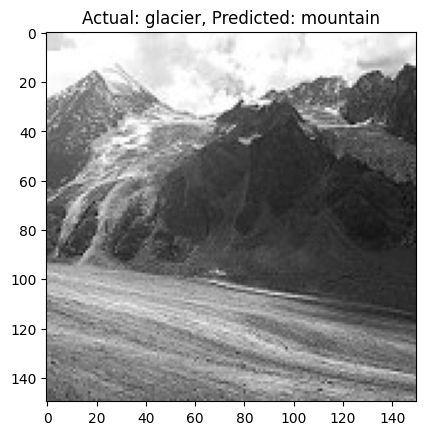

1


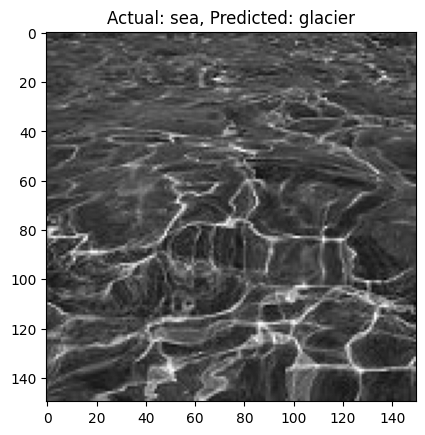

In [124]:
for i in range(2):
    print(i)
    sample_prediction(i)

In [76]:
CM = confusion_matrix(y_test, y_pred)
CM

array([[419,   2,   0,   0,   2,  14],
       [  2, 466,   0,   5,   0,   1],
       [  3,   3, 466,  55,  25,   1],
       [  1,   6,  45, 459,  13,   1],
       [  5,   1,  21,  10, 471,   2],
       [ 20,   0,   0,   4,   2, 475]], dtype=int64)

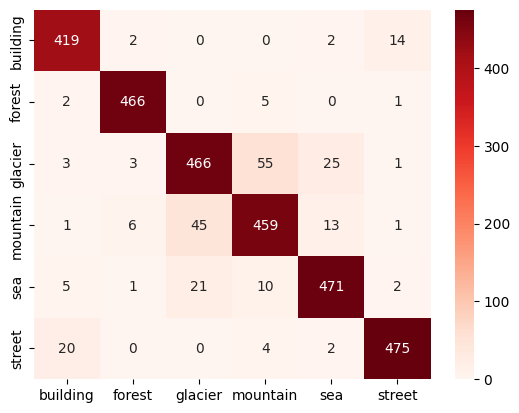

In [92]:
labels = ['building', 'forest', 'glacier', 'mountain', 'sea', 'street']
sns.heatmap(CM, annot=True, xticklabels=labels, yticklabels=labels, fmt='g', cmap='Reds')
plt.savefig("rf_confusion_matrix.jpg")

In [144]:
# use PCA to find most important features
# # Drop specified columns
columns_to_drop = ['files', 'labels', 'train_or_val']
df_train_pca = df_train.drop(columns=columns_to_drop)
df_test_pca = df_test.drop(columns=columns_to_drop[:2])

# Standardize the data 
scaler = StandardScaler()
train_standardized = scaler.fit_transform(df_train_pca)

# Apply PCA
start = time.time()
pca = PCA()
pca.fit(train_standardized)
pca_train = pca.transform(df_train_pca)
pca_test = pca.transform(df_test_pca)
end = time.time()
time_elapsed = end - start
print(f"Principal components determined in {time_elapsed} seconds.")

C:\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


Principal components determined in 49.94273018836975 seconds.


In [141]:
print(pca.components_.shape)
print(df_train_pca.shape)
print(pca.explained_variance_ratio_)
print(pca.n_components_)
print(pca_train.shape)

(2153, 3274)
(11230, 3274)
[7.30301078e-02 1.81118255e-02 1.76804536e-02 ... 8.90398361e-05
 8.89984187e-05 8.89446048e-05]
2153
(11230, 2153)


In [149]:
# let's try top-n from PCA, n = 1:30
training_times = []
accuracies = []
confusion_matrices = []
for n in range(1, 2000, 100):
    start = time.time()

    # create a PCA with n components
    pca = PCA(n_components = n)
    pca.fit(  )
    pca_train = pca.transform(df_train_pca)
    pca_test = pca.transform(df_test_pca)
    
    # fit a new model to the features
    rf = RandomForestClassifier()
    rf.fit(pca_train, y_train)
    
    end = time.time()
    time_elapsed = end - start

    # make predictions and compute accuracy
    y_pred = rf.predict(pca_test)
    accuracy = accuracy_score(y_test, y_pred)
    CM = confusion_matrix(y_test, y_pred)

    # save results for comparison
    training_times.append(time_elapsed)
    accuracies.append(accuracy)
    confusion_matrices.append(CM)

    print(f"Num components: {n}")
    print(f"Time elapsed: {time_elapsed}")
    print(f"Accuracy: {accuracy}")

TypeError: PCA.fit() missing 1 required positional argument: 'X'

In [150]:
# let's try our own single-feature models
df_train.columns

Index(['Unnamed: 0', 'files', 'labels', 'train_or_val', 'object_count',
       'lum_hist_1', 'lum_hist_2', 'lum_hist_3', 'lum_hist_4', 'lum_hist_5',
       ...
       'res_992', 'res_993', 'res_994', 'res_995', 'res_996', 'res_997',
       'res_998', 'res_999', 'res_1000', 'labels_numeric'],
      dtype='object', length=3277)

In [157]:
# object count
start = time.time()
object_count_train = df_train[['object_count']]
object_count_test = df_test[['object_count']]

rf = RandomForestClassifier()
rf.fit(object_count_train, y_train)
y_pred = rf.predict(object_count_test)
accuracy = accuracy_score(y_test, y_pred)
CM = confusion_matrix(y_test, y_pred)

end = time.time()

time_elapsed = end - start

print(time_elapsed)
print(accuracy)

1.6719114780426025
0.31433333333333335


In [158]:
# luminance
start = time.time()
cols = []
for i in range(1, 26):
    col = 'lum_hist_' + str(i)
    cols.append(col)

lum_train = df_train[cols]
lum_test = df_test[cols]
rf = RandomForestClassifier()
rf.fit(lum_train, y_train)
y_pred = rf.predict(lum_test)
accuracy = accuracy_score(y_test, y_pred)
CM = confusion_matrix(y_test, y_pred)

end = time.time()

time_elapsed = end - start

print(time_elapsed)
print(accuracy)

46.67473483085632
0.4713333333333333


In [159]:
# hog
start = time.time()
cols = []
for i in range(1, 2026):
    col = 'hog_' + str(i)
    cols.append(col)

hog_train = df_train[cols]
hog_test = df_test[cols]
rf = RandomForestClassifier()
rf.fit(hog_train, y_train)
y_pred = rf.predict(hog_test)
accuracy = accuracy_score(y_test, y_pred)
CM = confusion_matrix(y_test, y_pred)

end = time.time()

time_elapsed = end - start

print(time_elapsed)
print(accuracy)

452.9387266635895
0.6383333333333333


In [154]:
# res-net
start = time.time()
cols = []
for i in range(1, 1001):
    col = 'res_' + str(i)
    cols.append(col)

res_train = df_train[cols]
res_test = df_test[cols]
rf = RandomForestClassifier()
rf.fit(res_train, y_train)
y_pred = rf.predict(res_test)
accuracy = accuracy_score(y_test, y_pred)
CM = confusion_matrix(y_test, y_pred)

end = time.time()

time_elapsed = end - start

print(time_elapsed)
print(accuracy)

170.54125952720642
0.8693333333333333


# Hyperparameter Tuning

In [14]:
df_test['labels_numeric'] = df_test['labels'].map({'building':0,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5})
y_test = df_test['labels_numeric']
# df_test.head()
X_test = df_test.iloc[:,3:]

df_val['labels_numeric'] = df_val['labels'].map({'building':0,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5})
y_val = df_val['labels_numeric']
X_val = df_val.iloc[:,4:]
X_val.head()

,object_count,lum_hist_1,lum_hist_2,lum_hist_3,lum_hist_4,lum_hist_5,lum_hist_6,lum_hist_7,lum_hist_8,lum_hist_9,...,res_992,res_993,res_994,res_995,res_996,res_997,res_998,res_999,res_1000,labels_numeric
0,31,895,1000,1110,912,906,887,684,593,551,...,6.068750e-07,1.432506e-06,1.173351e-06,1.254524e-06,1.567509e-05,7.538531e-06,6.790710e-07,2.281866e-05,0.000003,0
1,13,826,2529,2733,1867,1591,1459,996,745,438,...,8.427673e-08,1.042106e-07,3.145591e-07,9.750902e-07,1.033166e-05,1.578540e-06,1.374476e-07,1.125658e-05,0.000004,0
2,35,361,261,365,463,540,679,629,601,603,...,8.341759e-07,9.723891e-07,6.783141e-07,1.119454e-06,1.707232e-05,1.800942e-06,3.846913e-07,1.511222e-05,0.000009,0
3,23,134,116,177,290,675,1178,1204,1239,1361,...,1.613872e-07,2.311923e-07,3.758608e-08,1.809683e-08,3.996203e-07,3.083824e-07,7.578512e-08,5.168336e-07,0.000003,0
4,23,398,375,464,544,566,780,799,819,888,...,3.307924e-08,2.677678e-07,4.151487e-07,5.803500e-08,1.340729e-06,4.832217e-06,1.474660e-07,1.819461e-05,0.000005,0


In [17]:
estimators = [10, 50, 100, 200]
depths = [2, 4, 6, 8, 10]

accuracies = []
index = 0

for estimator in estimators:
    accuracies.append([])
    
    for depth in depths:
        start = time.time()

        # fit the model
        rf = RandomForestClassifier(n_estimators=estimator, max_depth=depth)
        rf.fit(X_train, y_train)

        # predict the model on val set
        y_pred = rf.predict(X_val)
        val_accuracy = accuracy_score(y_val, y_pred)
        accuracies[index].append(val_accuracy)
        
        end = time.time()
        time_elapsed = end - start

        # print results
        print(f"Training random forest model on all features w/ {estimator} estimators and depth of {depth}...")
        print(f"...took {time_elapsed} seconds...")
        print(f"...achieved accuracy of {val_accuracy} on validation set.")
        print(accuracies)
        print()

    index += 1

Training random forest model on all features w/ 10 estimators and depth of 2...
...took 5.061027526855469 seconds...
...achieved accuracy of 0.604493580599144 on validation set.
[[0.604493580599144]]

Training random forest model on all features w/ 10 estimators and depth of 4...
...took 7.4335644245147705 seconds...
...achieved accuracy of 0.8448644793152639 on validation set.
[[0.604493580599144, 0.8448644793152639]]

Training random forest model on all features w/ 10 estimators and depth of 6...
...took 12.319638013839722 seconds...
...achieved accuracy of 0.8384450784593438 on validation set.
[[0.604493580599144, 0.8448644793152639, 0.8384450784593438]]

Training random forest model on all features w/ 10 estimators and depth of 8...
...took 16.725926399230957 seconds...
...achieved accuracy of 0.8737517831669044 on validation set.
[[0.604493580599144, 0.8448644793152639, 0.8384450784593438, 0.8737517831669044]]

Training random forest model on all features w/ 10 estimators and dept

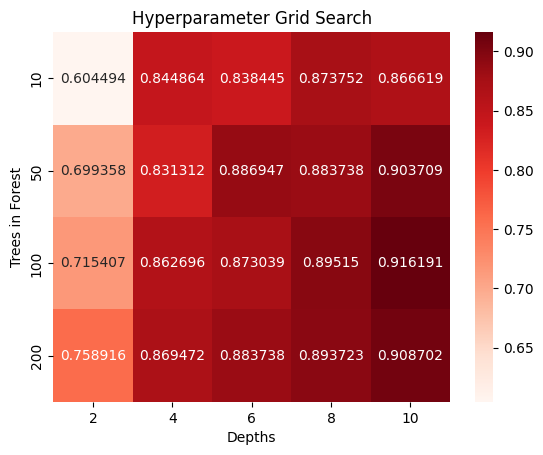

In [21]:
sns.heatmap(accuracies, annot=True, xticklabels=depths, yticklabels=estimators, fmt='g', cmap='Reds')
plt.title("Hyperparameter Grid Search")
plt.xlabel("Depths")
plt.ylabel("Trees in Forest")
plt.savefig("hyperparameter_tuning.jpg")

In [18]:
df_train.head()

,Unnamed: 0,files,labels,train_or_val,object_count,lum_hist_1,lum_hist_2,lum_hist_3,lum_hist_4,lum_hist_5,...,res_992,res_993,res_994,res_995,res_996,res_997,res_998,res_999,res_1000,labels_numeric
0,0,./seg_train/seg_train/buildings/0.jpg,building,training,5,410,257,331,478,617,...,2.158211e-06,5.904865e-07,1.288369e-06,9.919127e-07,1.897755e-05,0.000028,4.818478e-07,8.228128e-06,8.343523e-07,0
1,1,./seg_train/seg_train/buildings/1001.jpg,building,training,17,508,522,919,1239,1236,...,2.202982e-08,1.420953e-08,6.721601e-08,3.885782e-08,1.968007e-07,0.000001,1.973723e-08,6.154577e-07,4.719319e-07,0
2,2,./seg_train/seg_train/buildings/10014.jpg,building,training,46,451,640,491,586,589,...,3.305464e-07,1.655347e-07,2.085787e-08,6.880236e-07,5.563913e-06,0.000012,6.165252e-07,2.910279e-05,1.475344e-06,0
3,3,./seg_train/seg_train/buildings/10018.jpg,building,training,36,353,226,5700,7166,1368,...,2.811269e-07,7.010432e-06,4.059911e-07,3.939365e-06,2.139476e-07,0.000024,6.369614e-08,3.868958e-05,3.412553e-05,0
4,4,./seg_train/seg_train/buildings/10056.jpg,building,training,40,245,289,453,520,724,...,2.277373e-07,3.255058e-07,5.757029e-07,2.479512e-07,8.827865e-06,0.000007,3.589234e-07,5.496050e-06,7.935602e-06,0


In [33]:
# Drop specified columns
columns_to_drop = ['files', 'labels', 'labels_numeric', 'train_or_val']
df_train_pca = df_train.drop(columns=columns_to_drop)
df_test_pca = df_test.drop(columns=columns_to_drop[:3])
df_val_pca = df_val.drop(columns=columns_to_drop)

# Standardize the data 
scaler = StandardScaler()
train_standardized = scaler.fit_transform(df_train_pca)

# top 20 principal components
pca = PCA(n_components = 20)
pca.fit(df_train_pca)
pca_train = pca.transform(df_train_pca)
pca_val = pca.transform(df_val_pca)
pca_test = pca.transform(df_test_pca)

In [35]:
best_estimators = 100
best_depth = 10

start = time.time()

# fit the model
rf = RandomForestClassifier(n_estimators=best_estimators, max_depth=best_depth)
rf.fit(pca_train, y_train)

# predict the model on train set
y_pred = rf.predict(pca_train)
train_accuracy = accuracy_score(y_train, y_pred)
# predict the model on val set
y_pred = rf.predict(pca_val)
val_accuracy = accuracy_score(y_val, y_pred)
# predict the model on the test set
y_pred = rf.predict(pca_test)
test_accuracy = accuracy_score(y_test, y_pred)

# predict the model on the test set
end = time.time()
time_elapsed = end - start

# print results
print(f"Training random forest model on top 20 principal components...")
print(f"...took {time_elapsed} seconds...")
print(f"...achieved accuracy of {train_accuracy} on train set,")
print(f"...{val_accuracy} on validation set,")
print(f"...and {test_accuracy} on test set.")
print()

Training random forest model on top 20 principal components...
...took 19.558940887451172 seconds...
...achieved accuracy of 0.964113980409617 on train set,
...0.26961483594864477 on validation set,
...and 0.2623333333333333 on test set.



In [38]:
best_estimators = 100
best_depth = 10

start = time.time()

# fit the model
# rf = RandomForestClassifier(n_estimators=best_estimators, max_depth=best_depth)
# rf.fit(X_train, y_train)

# predict the model on train set
y_pred = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred)
CM_train = confusion_matrix(y_train, y_pred)

# predict the model on val set
y_pred = rf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred)
CM_val = confusion_matrix(y_val, y_pred)

# predict the model on the test set
y_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
CM_test = confusion_matrix(y_test, y_pred)

# predict the model on the test set
end = time.time()
time_elapsed = end - start

# print results
print(f"Training random forest model on top 20 principal components...")
print(f"...took {time_elapsed} seconds...")
print(f"...achieved accuracy of {train_accuracy} on train set,")
print(f"...{val_accuracy} on validation set,")
print(f"...and {test_accuracy} on test set.")
print()

Training random forest model on top 20 principal components...
...took 1.6421420574188232 seconds...
...achieved accuracy of 0.9794300979519145 on train set,
...0.9104850213980028 on validation set,
...and 0.9043333333333333 on test set.



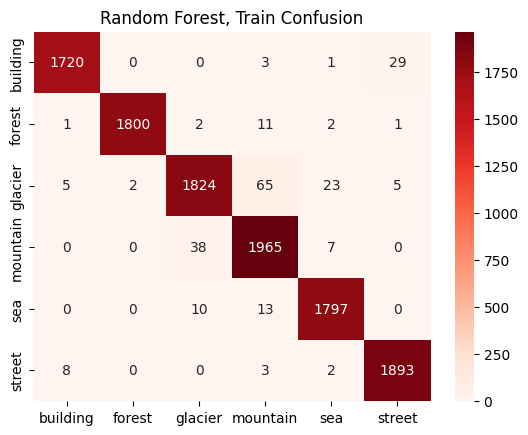

In [44]:
labels = ['building', 'forest', 'glacier', 'mountain', 'sea', 'street']
sns.heatmap(CM_train, annot=True, xticklabels=labels, yticklabels=labels, fmt='g', cmap='Reds')
plt.title("Random Forest, Train Confusion")
plt.savefig("rf_confusion_matrix_train.jpg")

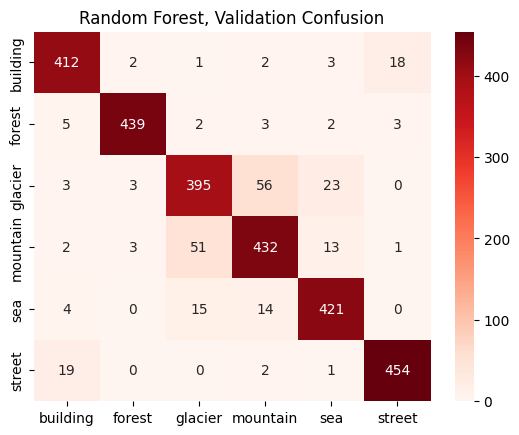

In [45]:
labels = ['building', 'forest', 'glacier', 'mountain', 'sea', 'street']
sns.heatmap(CM_val, annot=True, xticklabels=labels, yticklabels=labels, fmt='g', cmap='Reds')
plt.title("Random Forest, Validation Confusion")
plt.savefig("rf_confusion_matrix_val.jpg")

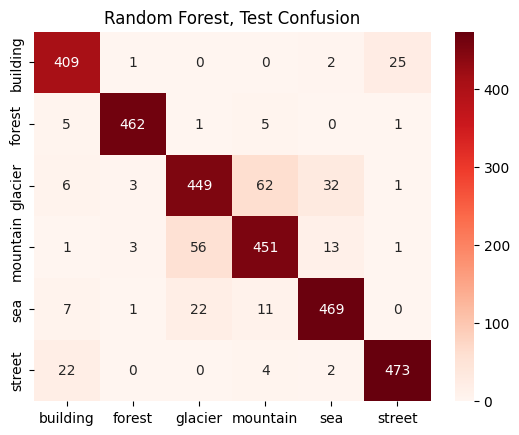

In [46]:
labels = ['building', 'forest', 'glacier', 'mountain', 'sea', 'street']
sns.heatmap(CM_test, annot=True, xticklabels=labels, yticklabels=labels, fmt='g', cmap='Reds')
plt.title("Random Forest, Test Confusion")
plt.savefig("rf_confusion_matrix_test.jpg")